# Homework 1: Principal Component Analysis (PCA) on Thyroid Disease Dataset
Ad Soyad: Önder Görmez  
Öğrenci No: 21501035


[UCI Machine Learning Repository](https://archive.ics.uci.edu/) web sitesinde, [Thyroid Disease](https://archive.ics.uci.edu/dataset/102/thyroid+disease) konusunun **Dataset Files** bölümü altında bulunan ["new-thyroid.data" ve "new-thyroid.names"](https://archive.ics.uci.edu/static/public/102/thyroid+disease.zip) dosyaları kullanılarak Principal Component Analysis (PCA) yani Temel Bileşen Analizi yöntemi ile sınıflandırma çalışmaları yapılacaktır.

# İçerik

[A) Veri Seti Analizi](#a)
* [1) Veri Setinin İçeriği](#a_1)
* [2) Kullanılan Özelliklerin Anlamı](#a_2)
  * [2.1) Eksik Veri Analizi (Missing Values Analysis)](#a_2_1)
  * [2.2) Yanlış Veri Analizi (Invalid Values Analysis)](#a_2_2)
* [3) Sınıf Sayısı, İsimleri ve Dağılımı](#a_3)
* [4) Veri Setindeki Özelliklerin Ayırt Edicilikleri](#a_4)
  * [4.1) T3-resin (%) Özelliği ile Sınıfların İlişkisinin Görselleştirilmesi](#a_4_1)
  * [4.2) Thyroxin Özelliği ile Sınıfların İlişkisinin Görselleştirilmesi](#a_4_2)
  * [4.3) Triiodothyronine Özelliği ile Sınıfların İlişkisinin Görselleştirilmesi](#a_4_3)
  * [4.4) Basal TSH Özelliği ile Sınıfların İlişkisinin Görselleştirilmesi](#a_4_4)
  * [4.5) MAD of TSH Özelliği ile Sınıfların İlişkisinin Görselleştirilmesi](#a_4_5)
* [5) Veri Setinin Ayırt Ediciliğine Göre Sıralanması](#a_5)
* [6) Outlier Analysis (Aykırı Değer Analizi)](#a_6)
  *  [6.1) T3-resin (%) Outlier Analysis](#a_6_1)
  *  [6.2) Thyroxin Outlier Analysis](#a_6_2)
  *  [6.3) Triiodothyronine Outlier Analysis](#a_6_3)
  *  [6.4) B. TSH Outlier Analysis](#a_6_4)
  *  [6.5) MAD of TSH Outlier Analysis](#a_6_5)
  *  [6.6) Removing All Outlier Samples From Dataset](#a_6_6)

[B) Temel Bileşen Analizi - Principal Component Analysis (PCA)](#b)
* [1) Sınıf Etiketlerinin Kaldırılması](#b_1)
* [2) Verisetinin Normalize Edilmesi](#b_2)
* [3) Feature ların Ortalaması](#b_3)
* [4) Kovaryans Matrisinin Hesaplanması](#b_4)
* [5) Öz değer ve Öz Vektör Hesabı (Eigenvalues and Eigenvectors)](#b_5)
* [6) Önemli Olan Feature ların Bulunması](#b_6)
* [7) Verinin 3 boyutlu Uzayda Çizdirilmesi](#b_7)

<h1 id="a">A) Veri Seti Analizi</h1>

Veri seti ve içerisinde bulunan sınıflarla alakalı açıklamalar [new-thyroid.names](new-thyroid.names) dosyası içerisinde bulunmaktadır.

<h3 id="a_1">1) Veri Setinin İçeriği</h3>

Veri setini aşağıdaki gibi okuyabiliriz. Okuduğumuz verinin içeriğine küçük bir bakış ve boyutu hakkında kısa bir bilgi aşağıdaki gibi;

In [303]:
import pandas as pd

WORKING_DIR = '/Users/ondergormez/Repos/BLM5116_Data_Mining_and_Knowledge_Discovery/04-Homeworks/Homework1/'
FILE_NAME = 'new-thyroid.data'
FILE_FULL_PATH = WORKING_DIR + FILE_NAME

dataset_df = pd.read_csv(FILE_FULL_PATH, header=None)

print('Shape of the DataFrame: ' + str(dataset_df.shape))
print()

# Print the first 5 rows of the DataFrame
print(dataset_df.head())

Shape of the DataFrame: (215, 6)

   0    1     2    3    4    5
0  1  107  10.1  2.2  0.9  2.7
1  1  113   9.9  3.1  2.0  5.9
2  1  127  12.9  2.4  1.4  0.6
3  1  109   5.3  1.6  1.4  1.5
4  1  105   7.3  1.5  1.5 -0.1


<h3 id="a_2">2) Kullanılan Özelliklerin Anlamı</h3>


Yukarıda görüldüğü gibi veri seti içerisinde kolon isimleri bulunmamaktadır. Bu bilgileri ekleyerek veriyi daha anlaşılır bir hale getirebiliriz. Bunun için [new-thyroid.names](new-thyroid.names) dosyasındaki bilgilerden yararlanılır.

> For Each Attribute: (please give both acronym and full name if both exist)  
    Attr. no :  
    1: Class attribute (1 = normal, 2 = hyper, 3 = hypo)  
    2: T3-resin uptake test. (A percentage)  
    3: Total Serum thyroxin as measured by the isotopic displacement method.   
    4: Total serum triiodothyronine as measured by radioimmuno assay.  
    5: basal thyroid-stimulating hormone (TSH) as measured by  radioimmuno assay.  
    6: Maximal absolute difference of TSH value after injection of 200 micro grams of thyrotropin-releasing hormone as compared to the basal value.  

In [304]:
# Set the column names
dataset_df.columns = ["Class", "T3-resin (%)", "Thyroxin", "Triiodothyronine", "B. TSH", "MAD of TSH"]

print('Shape of the DataFrame: ' + str(dataset_df.shape))
print()

# Verify the DataFrame
print(dataset_df.head())

Shape of the DataFrame: (215, 6)

   Class  T3-resin (%)  Thyroxin  Triiodothyronine  B. TSH  MAD of TSH
0      1           107      10.1               2.2     0.9         2.7
1      1           113       9.9               3.1     2.0         5.9
2      1           127      12.9               2.4     1.4         0.6
3      1           109       5.3               1.6     1.4         1.5
4      1           105       7.3               1.5     1.5        -0.1


<h4 id="a_2_1">2.1) Eksik Veri Analizi (Missing Values Analysis)</h4>

Eksik veri analizi için aşağıdaki kod parçası çalıştırılır.

In [305]:
def print_null_value_counts(data_frame):
    
    for feature_name in data_frame.columns:
        print("Null values for '" + feature_name + "': " + str(len(data_frame[pd.isnull(data_frame[feature_name])])))

In [306]:
print_null_value_counts(dataset_df)

Null values for 'Class': 0
Null values for 'T3-resin (%)': 0
Null values for 'Thyroxin': 0
Null values for 'Triiodothyronine': 0
Null values for 'B. TSH': 0
Null values for 'MAD of TSH': 0


Yukarıda görüldüğü gibi verisetinde herhangi bir eskik veri bulunmamaktadır. Bu durumda veri seti üzerinde herhangi bir işlem yapmamıza gerek yoktur.

<h4 id="a_2_2">2.2) Yanlış Veri Analizi (Invalid Values Analysis)</h4>

In [307]:
# check dimensions of categoric features for invalid values
print('Class unique values: ' + str(dataset_df['Class'].unique()))

Class unique values: [1 2 3]


Yukarıdaki yapılan doğrulama ile class kolonu içerisindeki datada yanlış bir etiket olmadığı doğrulanmıştır.  

Diğer feature ların içerisinde **negatif bir değer olmaması beklenmektedir**. Fakat bunun veri seti üzerinde kesinlikle doğru olan bir şey olduğu bilinmediğinden verideki datalarda bir replacement yapılmayacaktır.

In [308]:
def print_negative_values(data_frame):

    for feature_name in data_frame.columns:
        negative_values = data_frame[data_frame[feature_name] < 0]
        if not negative_values.empty:
            print()
            print(f'Counts of negative values in "{feature_name}": ' + str(len(negative_values)))
            print(f'Values in "{feature_name}" less than 0:')
            print(negative_values)
        else:
            print(f'No values in "{feature_name}" less than 0.')

In [309]:
print_negative_values(dataset_df)

No values in "Class" less than 0.
No values in "T3-resin (%)" less than 0.
No values in "Thyroxin" less than 0.
No values in "Triiodothyronine" less than 0.
No values in "B. TSH" less than 0.

Counts of negative values in "MAD of TSH": 28
Values in "MAD of TSH" less than 0:
     Class  T3-resin (%)  Thyroxin  Triiodothyronine  B. TSH  MAD of TSH
4        1           105       7.3               1.5     1.5        -0.1
22       1           109      10.4               1.9     0.4        -0.1
48       1           100       9.5               2.5     1.3        -0.2
50       1           100      11.3               2.5     0.7        -0.3
83       1            98       9.1               1.4     1.9        -0.3
88       1           105       8.1               2.0     1.9        -0.5
96       1           114      11.1               2.4     2.0        -0.3
104      1           114       8.4               1.6     1.6        -0.2
121      1            98      10.4               1.6     2.3        

Yukarıdaki çıktılardan anlaşılacağı üzere "MAD of TSH" kolonunda negatif değerler bulunmaktadır. 28 tane negatif değerin hatalı olup olmadığı **konunun expertleri tarafından incelenmelidir**.  

**Bunu şu anda yapamayacağımız için değerler üzerinde bir değşiklik yapmadık.**

<h3 id="a_3">3) Sınıf Sayısı, İsimleri ve Dağılımı</h3>

Veri setinde bulunan sınıfların sayısı ve dağılımı aşağıdaki gibi incelenebilir.
* Sınıf kolonunda bulunan değerler sayı olmasına rağmen, bu sayılar aslında kategorik verilerdir.
* Bu yüzden bu kolonun tipi kategorik olarak aşağıdaki şekilde değiştirilmiştir. 

Class
normal    150
hyper      35
hypo       30
Name: count, dtype: int64


/var/folders/kt/9bt2gtzs58s3n2cs23mm__qw0000gn/T/ipykernel_51119/360590051.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, class_counts[i] + 1, str(class_counts[i]), ha='center', va='bottom')


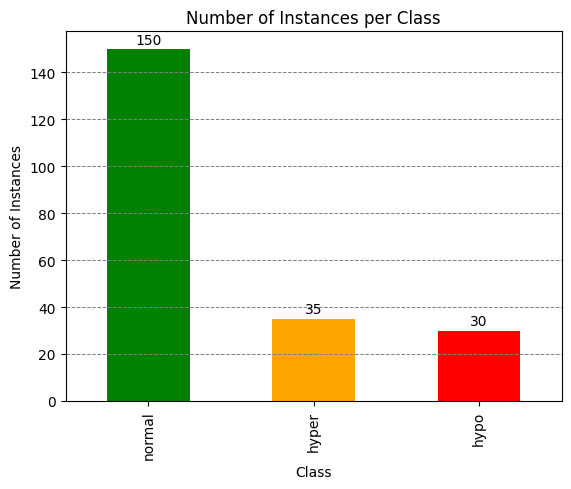

In [310]:
# Create a mapping dictionary
class_mapping = {1: 'normal', 2: 'hyper', 3: 'hypo'}

# Map the class attribute values to their corresponding class names if present in the mapping
dataset_df['Class'] = dataset_df['Class'].map(lambda x: class_mapping.get(x, x))

# Count the number of instances for each class
class_counts = dataset_df['Class'].value_counts()

# Display the counts
print(class_counts)

import matplotlib.pyplot as plt

# Define colors for each class
colors = ['green', 'orange', 'red']

# Plot the class counts as a bar chart
class_counts.plot(kind='bar', color=colors)
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.title('Number of Instances per Class')
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

# Annotate each bar with the count value
for i in range(len(class_counts)):
    plt.text(i, class_counts[i] + 1, str(class_counts[i]), ha='center', va='bottom')

plt.show()

Elde edilen veriden anlaşıldığı üzere sınıf özelliği içerisinde; 
* 150 tane Class 1 yani normal, 
* 35 tane Class 2 yani hyper ve 
* 30 tane Class 3 yani hypo

olarak etiketlenmiş veri bulunmaktadır.

<h3 id="a_4">4) Veri Setindeki Özelliklerin Ayırt Edicilikleri</h3>

Veri setindeki özelliklerin ayırt ediciliklerini anlamak için hangi sınıf için hangi değeri aldıklarını ve sınıflara göre aldıkları değerlerin değişimi hakkında bilgi edinmek gerekir. Bunu;
* Mümkünse görsellleştirme yaparak gözle değerlendirebiliriz. Sınıflarımız katagorik veri olduğu için katagorik veri görselleştirme tekniklerinden yararlanmalıyız. Bunun için çalışmalarda daha çok swarmplot veya strip plot kullanılmaktadır. Bu ödev kapsamında swarm plot kullanılmasına karar verildi.

<h4 id="a_4_1">4.1) T3-resin (%) Özelliği ile Sınıfların İlişkisinin Görselleştirilmesi</h4>

In [311]:
import seaborn as sns

def plot_class_distribution(data_frame, feature_name):
   
    temp_df = data_frame.loc[:, ['Class', feature_name]]

    # print(data_frame.shape)
    # print(data_frame.head())

    # Creating a swarm plot
    sns.swarmplot(data=data_frame, x=feature_name, y='Class', hue='Class', legend=True, palette={'normal': 'green', 'hyper': 'orange', 'hypo': 'red'})
    plt.title(feature_name + ' Feature Distribution by Classes')
    plt.grid(axis='x', color='gray', linestyle='--', linewidth=0.7)
    plt.show()

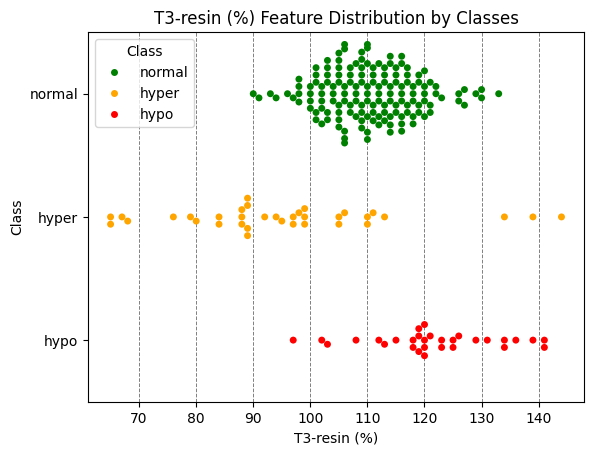

In [312]:
feature_name = 'T3-resin (%)'
t3_resin_df = dataset_df.loc[:, ['Class', feature_name]]
plot_class_distribution(t3_resin_df, feature_name)

Yukarıdaki grafikten görüldüğü gibi T3-resin (%) özelliği için;
* Normal olarak etiketlenen değerlerin 100 ile 120 arasındaki değerlerde yoğunlaştığı,
* Hyper olarak etiketlenen değerlerin 70 ile 140 arasında eşite yakın dağıldığı, yani bu sınıf için T3-resin değerinin bir seçiciliği olmadığı, ama hyper olanların 120 ile 130 arasında hiç çıkmadığı,
* Hypo olarak etiketlenen değerlerin 100 ile 140 arasında dağıldığı ve 120 civarında yoğunlaştığı görülmektedir.

<h4 id="a_4_2">4.2) Thyroxin Özelliği ile Sınıfların İlişkisinin Görselleştirilmesi</h4>

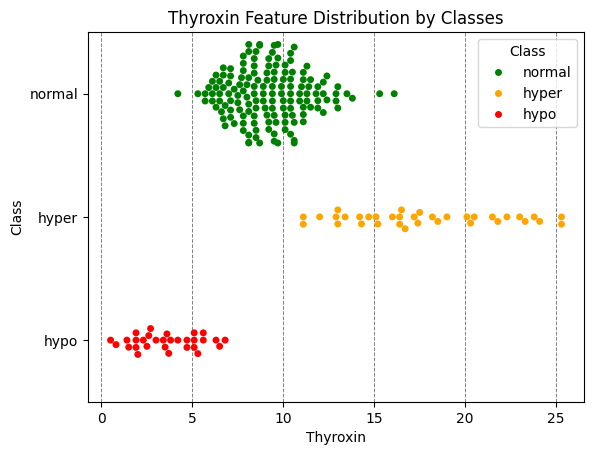

In [313]:
feature_name = 'Thyroxin'
thyroxin_df = dataset_df.loc[:, ['Class', feature_name]]
plot_class_distribution(thyroxin_df, feature_name)

Yukarıdaki grafikten görüldüğü gibi Thyroxin özelliği için;
* Normal olarak etiketlenen değerlerin 5 ile 15 arasındaki değerlerde yoğunlaştığı,
* Hyper olarak etiketlenen değerlerin 10 ile 25 arasında eşite yakın dağıldığı ve hyper olanların hiç 10 dan küçük değerler almadığı,
* Hypo olarak etiketlenen değerlerin yaklaşık 0 ile 7.5 arasında dağıldığı ve 7.5 dan büyük değerler almadığı görülmektedir.

Yukarıdakilerden özetle eğer Thyroxin değeri 7.5 ile 11 arasında ise normal olma ihtimali yüksektir diyebiliriz.

<h4 id="a_4_3">4.3) Triiodothyronine Özelliği ile Sınıfların İlişkisinin Görselleştirilmesi</h4>

/Users/ondergormez/Repos/python_3_12_2_venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 11.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ondergormez/Repos/python_3_12_2_venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 21.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


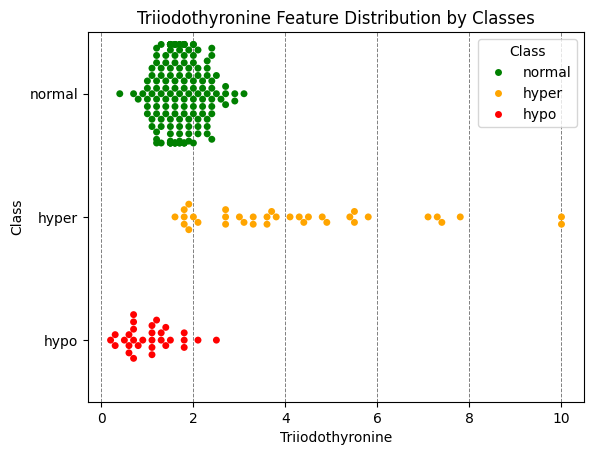

In [314]:
feature_name = 'Triiodothyronine'
triiodothyronine_df = dataset_df.loc[:, ['Class', feature_name]]
plot_class_distribution(triiodothyronine_df, feature_name)

Yukarıdaki grafikten görüldüğü gibi Triiodothyronine özelliği için;
* Normal olarak etiketlenen değerlerin yaklaşık 1 ile 2.5 arasındaki değerlerde yoğunlaştığı,
* Hyper olarak etiketlenen değerlerin 1.8 ile 10 arasında dağıldığı ve hyper olanların hiç 1.8 dan küçük değerler almadığı,
* Hypo olarak etiketlenen değerlerin yaklaşık 0 ile 2.5 arasında dağıldığı ve 2.5 dan büyük değerler almadığı görülmektedir.

<h4 id="a_4_4">4.4) Basal TSH Özelliği ile Sınıfların İlişkisinin Görselleştirilmesi</h4>

/Users/ondergormez/Repos/python_3_12_2_venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 68.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ondergormez/Repos/python_3_12_2_venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ondergormez/Repos/python_3_12_2_venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 74.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ondergormez/Repos/python_3_12_2_venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 31.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(ms

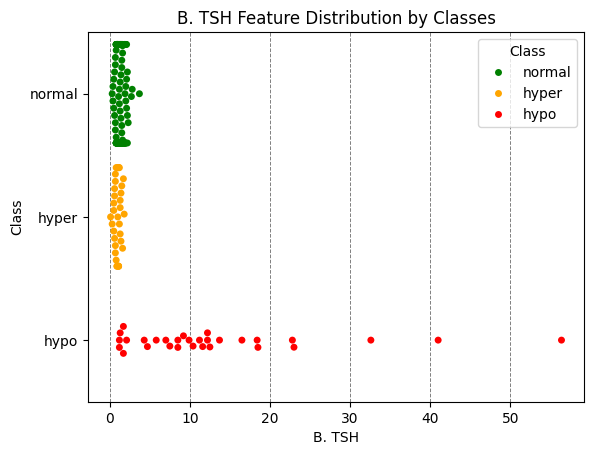

In [315]:
feature_name = 'B. TSH'
b_tsh_df = dataset_df.loc[:, ['Class', feature_name]]
plot_class_distribution(b_tsh_df, feature_name)

Yuakrıdaki grafikten görüldüğü gibi Basal TSH özelliği için;
* Normal olarak etiketlenen değerlerin yaklaşık 0 ile 2.5 arasındaki değerlerde yoğunlaştığı ve 2.5 dan büyük değerler almadığı,
* Hyper olarak etiketlenen değerlerin 0 ile 2 arasındaki değerlerde yoğunlaştığı ve 2 den büyük değerler almadığı,
* Hypo olarak etiketlenen değerlerin 0 dan başlayarak 20 ye kadar yoğunlaştığı fakat, 57 gibi bir değere kadar gidebildiği görülmektedir.

Yukarıdakilerden özetle, B. TSH hypo olanları tespit etmek için kullanılabilecek güçlü bir özelliktir.

<h4 id="a_4_5">4.5) MAD of TSH Özelliği ile Sınıfların İlişkisinin Görselleştirilmesi</h4>

/Users/ondergormez/Repos/python_3_12_2_venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 20.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ondergormez/Repos/python_3_12_2_venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 37.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ondergormez/Repos/python_3_12_2_venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 36.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ondergormez/Repos/python_3_12_2_venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 54.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(ms

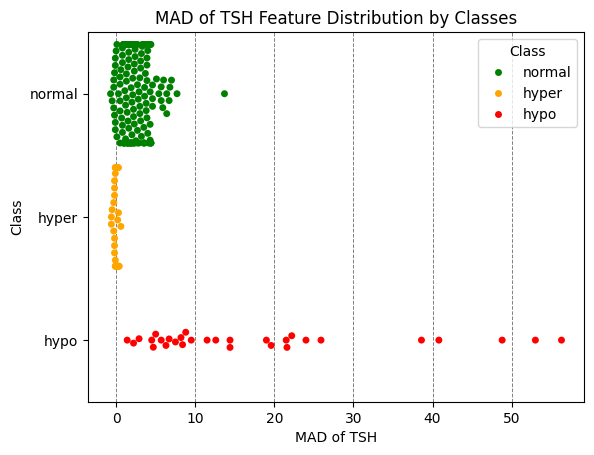

In [316]:
feature_name = 'MAD of TSH'
mad_of_tsh_df = dataset_df.loc[:, ['Class', feature_name]]
plot_class_distribution(mad_of_tsh_df, feature_name)

Yukarıdaki grafikten görüldüğü gibi MAD of TSH özelliği için;
* Normal olarak etiketlenen değerlerin yaklaşık 0 ile 8 arasındaki değerlerde yoğunlaştığı ve 15 dan büyük değerler almadığı,
* Hyper olarak etiketlenen değerlerin 0 ile 1 arasındaki değerlerde yoğunlaştığı ve 1 den büyük değerler almadığı,
* Hypo olarak etiketlenen değerlerin 0 dan başlayarak 58 kadar dağıldığı görülmektedir.

Yukarıdakilerden özetle, MAD of TSH hypo olanları tespit etmek için kullanılabilecek güçlü bir özelliktir.

<h3 id="a_5">5) Veri Setinin Ayırt Ediciliğine Göre Sıralanması</h3>

Veri setinin ayırt ediciliğini bilgi kazancı ile ölçebiliriz.
* Bunun için Entropy hesabı yapılmalıdır.
* Entropy den ağırlıklanmış entropy çıkarılarak bilgi kazancı hesaplanır.



<h4 id="">Entropy Formülü</h4>


$$ \text{Entropy}(S) = - \sum_{i=1}^{c} p_i \log_2(p_i) $$  


<h4 id="">Information Gain Formülü</h4>

$$ \text{IG}(S, A) = \text{Entropy}(S) - \sum_{v \in \text{Values}(A)} \frac{|S_v|}{|S|} \text{Entropy}(S_v) $$  

* S: Tüm veri seti
* A: Özellik

In [317]:
import numpy as np

def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts=True)
    entropy = np.sum([(-counts[i]/np.sum(counts)) * np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy

def information_gain(data, feature_name, target_name="Class"):
    # Calculate the entropy of the total dataset
    total_entropy = entropy(data[target_name])
    
    # Calculate the values and the corresponding counts for the split attribute
    vals, counts = np.unique(data[feature_name], return_counts=True)
    
    # Calculate the weighted entropy
    weighted_entropy = np.sum([(counts[i]/np.sum(counts)) * entropy(data.where(data[feature_name] == vals[i]).dropna()[target_name]) for i in range(len(vals))])
    
    # Calculate the information gain
    information_gain = total_entropy - weighted_entropy

    print(f'Information Gain for "{feature_name}": {information_gain}')
    print()
    
    return information_gain

In [318]:
# Calculate information gain for all features
ig_for_t3_resin = information_gain(dataset_df, 'T3-resin (%)')

ig_for_thyroxin = information_gain(dataset_df, 'Thyroxin')

ig_for_triiodothyronine = information_gain(dataset_df, 'Triiodothyronine')

ig_for_b_tsh = information_gain(dataset_df, 'B. TSH')

ig_for_mad_of_tsh = information_gain(dataset_df, 'MAD of TSH')

Information Gain for "T3-resin (%)": 0.7145840332274254

Information Gain for "Thyroxin": 1.0640241471909582

Information Gain for "Triiodothyronine": 0.7069811729067033

Information Gain for "B. TSH": 0.6008292906257884

Information Gain for "MAD of TSH": 0.9418205896962293



Yukarıda görülen verilerden anlaşıldığı üzere özelliklerin ayırt ediciliği sırasıyla;
* Thyroxin
* MAD of TSH
* T3-resin
* Triiodothyronine
* B. TSH

şeklindedir.

<h3 id="a_6">6) Outlier Analysis (Aykırı Değer Analizi)</h3>

Box plot datayı görselleştirmek için kullanılan bir yöntemdir.
* Bu yöntemde veri setinin çeyrekliklerine bakılarak aykırı değerlerin tespit edilmesi hedeflenir.
* 5 değerle veri seti görselleştirilir. Bunlar Q1, Q3, IQR, Alt sınır ve Üst sınır değerleridir.
* IQR = Q3 - Q1. IQR: Inter Quartile Range olarak adlandırılır.
* Alt sınır = Q1 - 1.5 * IQR
* Üst sınır = Q3 + 1.5 * IQR
* Alt sınır ve üst sınır dışında kalan değerler aykırı değer olarak kabul edilir.

In [319]:
def draw_box_plot_and_get_outlier_list_from_box_plot_analysis(data_frame, feature_name):

    classes = ['normal', 'hyper', 'hypo']

    # Initialize an empty dictionary to store plot values
    all_box_plot_values_dict = {}

    all_outlier_indexes = []

    # Calculate the quartiles and median for each class
    for class_name in classes:
        class_values = data_frame[data_frame['Class'] == class_name][feature_name]

        class_box_plot_values_dict = {}

        min_value = round(class_values.min(), 2)
        median_value = round(class_values.median(), 2)
        max_value = round(class_values.max(), 2)
        
        first_quartile = class_values.quantile(0.25)
        third_quartile = class_values.quantile(0.75)
        iqr = third_quartile - first_quartile

        lower_bound = round(first_quartile - 1.5 * iqr, 2)
        upper_bound = round(third_quartile + 1.5 * iqr, 2)

        if min_value < lower_bound:
            outlier_indexes = class_values[class_values < lower_bound].index
            outlier_values = class_values[class_values < lower_bound].values
            all_outlier_indexes.append(outlier_indexes)

            print(f'{outlier_values.size} utliers detected in lower bound for feature "{feature_name}" in class "{class_name}". Lower bound "{lower_bound}", outliers: "{outlier_values}"')
            print(f'indexes of outliers: {outlier_indexes}')
        else:
            print(f'No outliers detected for feature "{feature_name}" in class "{class_name}" below the lower bound of "{lower_bound}"')
            print(f'Updating the lower bound to the minimum value: "{min_value}"')
            lower_bound = min_value

        print()

        if max_value > upper_bound:
            outlier_indexes = class_values[class_values > upper_bound].index
            outlier_values = class_values[class_values > upper_bound].values
            all_outlier_indexes.append(outlier_indexes)

            print(f'{outlier_values.size} outliers detected in upper bound for feature "{feature_name}" in class "{class_name}". Upper bound "{upper_bound}", outliers: "{outlier_values}"')
            print(f'indexes of outliers: {outlier_indexes}')
        else:
            print(f'No outliers detected for feature "{feature_name}" in class "{class_name}" above the upper bound of "{upper_bound}"')
            print(f'Updating the upper bound to the maximum value: "{max_value}"')
            upper_bound = max_value

        class_box_plot_values_dict['upper_bound'] = upper_bound
        class_box_plot_values_dict['third_quartile'] = third_quartile
        class_box_plot_values_dict['median'] = median_value
        class_box_plot_values_dict['first_quartile'] = first_quartile
        class_box_plot_values_dict['lower_bound'] = lower_bound
        all_box_plot_values_dict[class_name] = class_box_plot_values_dict

        print()
        print()

    print(f'All outlier indexes for feature "{feature_name}": {all_outlier_indexes}')
    print()

    from IPython.display import display
    print(f'Displaying all box plot values for each class for feature "{feature_name}":')
    all_box_plot_values_df = pd.DataFrame(all_box_plot_values_dict)
    display(all_box_plot_values_df)

    feature = data_frame[feature_name]
    sns.boxplot(data=data_frame, x='Class', y=feature, hue='Class', legend=True, palette={'normal': 'green', 'hyper': 'orange', 'hypo': 'red'})

    # Add box plot values to the plot
    for box_plot_idx, class_name in enumerate(all_box_plot_values_dict.keys()):
        class_box_plot_values_dict = all_box_plot_values_dict[class_name]

        for value_name in ['lower_bound', 'first_quartile', 'median', 'third_quartile', 'upper_bound']:
            value = class_box_plot_values_dict[value_name]
            plt.text(box_plot_idx, value, f'{value:.2f}', ha='center', va='bottom', fontsize=9, color='black')    

    plt.title(f'Box Plot of "{feature_name}" by Class')
    plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.7)
    plt.show()

    return all_outlier_indexes

<h4 id="a_6_1">6.1) T3-resin (%) Outlier Analysis</h4>

No outliers detected for feature "T3-resin (%)" in class "normal" below the lower bound of "88.5"
Updating the lower bound to the minimum value: "90"

1 outliers detected in upper bound for feature "T3-resin (%)" in class "normal". Upper bound "132.5", outliers: "[133]"
indexes of outliers: Index([72], dtype='int64')


No outliers detected for feature "T3-resin (%)" in class "hyper" below the lower bound of "57.5"
Updating the lower bound to the minimum value: "65"

3 outliers detected in upper bound for feature "T3-resin (%)" in class "hyper". Upper bound "133.5", outliers: "[139 134 144]"
indexes of outliers: Index([150, 156, 178], dtype='int64')


2 utliers detected in lower bound for feature "T3-resin (%)" in class "hypo". Lower bound "102.62", outliers: "[ 97 102]"
indexes of outliers: Index([213, 214], dtype='int64')

No outliers detected for feature "T3-resin (%)" in class "hypo" above the upper bound of "143.62"
Updating the upper bound to the maximum value: "141"


All outlier

,normal,hyper,hypo
upper_bound,132.5,133.5,141.00
third_quartile,116.0,105.0,128.25
median,110.0,94.0,120.00
first_quartile,105.0,86.0,118.00
lower_bound,90.0,65.0,102.62


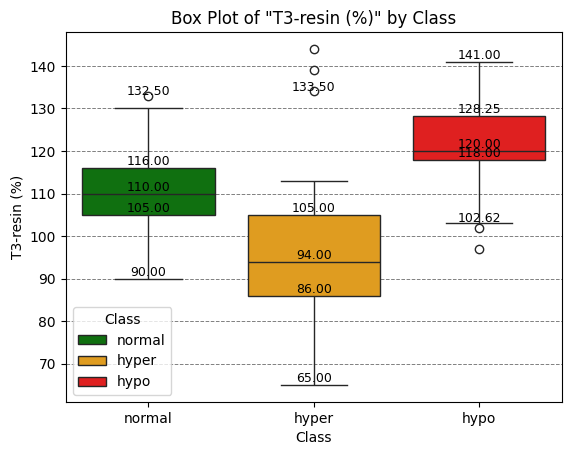

In [320]:
feature_name = 'T3-resin (%)'
t3_resin_outliers = draw_box_plot_and_get_outlier_list_from_box_plot_analysis(dataset_df, feature_name)

Yukarıdaki grafikten anlaşıldığı üzere T3-resin özelliği için **her sınıf içerisinde outlier** olarak nitelendirilebilecek **değerler olduğu görülmektedir**.

Yukarıda görüldüğü gibi hyper için çizdirilen box plot upper bound değeri 133.5 olması gerekirken çizim üzerinde 112.5 civarında kaldığı görüldü. sns.boxplot fonksiyonu ile alakalı bir durum olduğunu düşünüyorum. Değer olarak doğru değerleri alıyoruz.

<h4 id="a_6_2">6.2) Thyroxin Outlier Analysis</h4>

No outliers detected for feature "Thyroxin" in class "normal" below the lower bound of "3.9"
Updating the lower bound to the minimum value: "4.2"

2 outliers detected in upper bound for feature "Thyroxin" in class "normal". Upper bound "14.3", outliers: "[15.3 16.1]"
indexes of outliers: Index([80, 110], dtype='int64')


No outliers detected for feature "Thyroxin" in class "hyper" below the lower bound of "4.75"
Updating the lower bound to the minimum value: "11.1"

No outliers detected for feature "Thyroxin" in class "hyper" above the upper bound of "30.75"
Updating the upper bound to the maximum value: "25.3"


No outliers detected for feature "Thyroxin" in class "hypo" below the lower bound of "-2.46"
Updating the lower bound to the minimum value: "0.5"

No outliers detected for feature "Thyroxin" in class "hypo" above the upper bound of "9.64"
Updating the upper bound to the maximum value: "6.8"


All outlier indexes for feature "Thyroxin": [Index([80, 110], dtype='int64')]

Displa

,normal,hyper,hypo
upper_bound,14.30,25.3,6.800
third_quartile,10.40,21.0,5.100
median,9.15,17.2,3.550
first_quartile,7.80,14.5,2.075
lower_bound,4.20,11.1,0.500


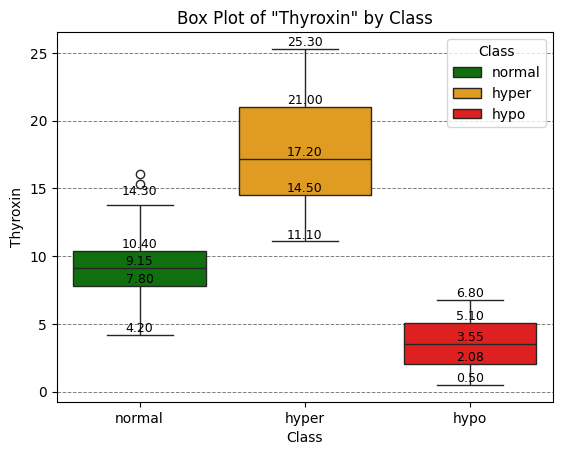

In [321]:
feature_name = 'Thyroxin'
thyroxin_outliers = draw_box_plot_and_get_outlier_list_from_box_plot_analysis(dataset_df, feature_name)

Yukarıdaki grafikten anlaşılacağı üzere **sadece normal** olarak değerlendirilen **sınıf içerisinde outlier** olarak nitelendirilebilecek **değerler bulunmaktadır**.

<h4 id="a_6_3">6.3) Triiodothyronine Outlier Analysis</h4>

1 utliers detected in lower bound for feature "Triiodothyronine" in class "normal". Lower bound "0.5", outliers: "[0.4]"
indexes of outliers: Index([141], dtype='int64')

1 outliers detected in upper bound for feature "Triiodothyronine" in class "normal". Upper bound "2.9", outliers: "[3.1]"
indexes of outliers: Index([1], dtype='int64')


No outliers detected for feature "Triiodothyronine" in class "hyper" below the lower bound of "-1.42"
Updating the lower bound to the minimum value: "1.6"

2 outliers detected in upper bound for feature "Triiodothyronine" in class "hyper". Upper bound "9.57", outliers: "[10. 10.]"
indexes of outliers: Index([155, 166], dtype='int64')


No outliers detected for feature "Triiodothyronine" in class "hypo" below the lower bound of "-0.31"
Updating the lower bound to the minimum value: "0.2"

1 outliers detected in upper bound for feature "Triiodothyronine" in class "hypo". Upper bound "2.39", outliers: "[2.5]"
indexes of outliers: Index([188], dtype='int

,normal,hyper,hypo
upper_bound,2.9,9.57,2.390
third_quartile,2.0,5.45,1.375
median,1.7,3.70,1.100
first_quartile,1.4,2.70,0.700
lower_bound,0.5,1.60,0.200


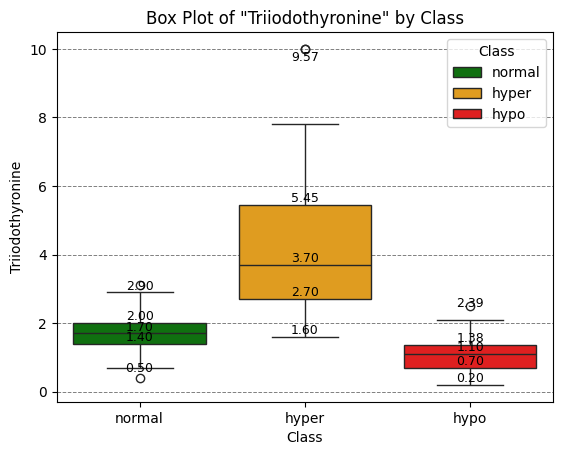

In [322]:
feature_name = 'Triiodothyronine'
triiodothyronine_outliers = draw_box_plot_and_get_outlier_list_from_box_plot_analysis(dataset_df, feature_name)

Yukarıdaki grafikten anlaşılacağı **üzere tüm sınıflar içerisinde outlier** olarak nitelendirilebilecek **değerler bulunmaktadır**.

<h4 id="a_6_4">6.4) B. TSH Outlier Analysis</h4>

No outliers detected for feature "B. TSH" in class "normal" below the lower bound of "0.1"
Updating the lower bound to the minimum value: "0.3"

3 outliers detected in upper bound for feature "B. TSH" in class "normal". Upper bound "2.5", outliers: "[3.7 2.8 2.7]"
indexes of outliers: Index([13, 85, 103], dtype='int64')


No outliers detected for feature "B. TSH" in class "hyper" below the lower bound of "-0.13"
Updating the lower bound to the minimum value: "0.1"

No outliers detected for feature "B. TSH" in class "hyper" above the upper bound of "2.08"
Updating the upper bound to the maximum value: "1.8"


No outliers detected for feature "B. TSH" in class "hypo" below the lower bound of "-11.26"
Updating the lower bound to the minimum value: "1.2"

3 outliers detected in upper bound for feature "B. TSH" in class "hypo". Upper bound "32.04", outliers: "[56.4 32.6 41. ]"
indexes of outliers: Index([194, 203, 207], dtype='int64')


All outlier indexes for feature "B. TSH": [Index([13, 

,normal,hyper,hypo
upper_bound,2.5,1.80,32.040
third_quartile,1.6,1.25,15.800
median,1.3,1.00,10.150
first_quartile,1.0,0.70,4.975
lower_bound,0.3,0.10,1.200


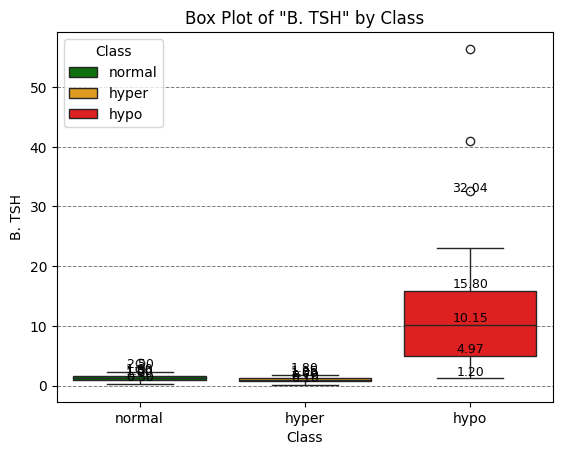

In [323]:
feature_name = 'B. TSH'
b_tsh_outliers = draw_box_plot_and_get_outlier_list_from_box_plot_analysis(dataset_df, feature_name)

Yukarıdaki grafikten anlaşılacağı üzere **hyper sınıfı hariç** diğer sınıflar içerisinde **outlier** olarak nitelendirilebilecek **değerler bulunmaktadır**.

<h4 id="a_6_5">6.5) MAD of TSH Outlier Analysis</h4>

No outliers detected for feature "MAD of TSH" in class "normal" below the lower bound of "-2.51"
Updating the lower bound to the minimum value: "-0.7"

2 outliers detected in upper bound for feature "MAD of TSH" in class "normal". Upper bound "7.39", outliers: "[13.7  7.7]"
indexes of outliers: Index([49, 119], dtype='int64')


No outliers detected for feature "MAD of TSH" in class "hyper" below the lower bound of "-0.8"
Updating the lower bound to the minimum value: "-0.6"

No outliers detected for feature "MAD of TSH" in class "hyper" above the upper bound of "0.8"
Updating the upper bound to the maximum value: "0.6"


No outliers detected for feature "MAD of TSH" in class "hypo" below the lower bound of "-17.08"
Updating the lower bound to the minimum value: "1.4"

3 outliers detected in upper bound for feature "MAD of TSH" in class "hypo". Upper bound "45.53", outliers: "[48.8 56.3 53. ]"
indexes of outliers: Index([192, 195, 198], dtype='int64')


All outlier indexes for feature "

,normal,hyper,hypo
upper_bound,7.390,0.6,45.53
third_quartile,3.675,0.2,22.05
median,2.200,0.0,12.05
first_quartile,1.200,-0.2,6.40
lower_bound,-0.700,-0.6,1.40


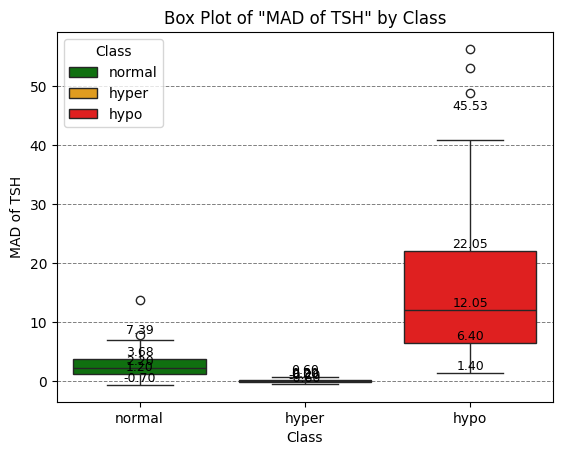

In [324]:
feature_name = 'MAD of TSH'
mad_of_tsh_outliers = draw_box_plot_and_get_outlier_list_from_box_plot_analysis(dataset_df, feature_name)

Yukarıdaki grafikten anlaşılacağı üzere **hyper sınıfı hariç** diğer sınıflar içerisinde **outlier** olarak nitelendirilebilecek **değerler bulunmaktadır**.

<h4 id="a_6_6">6.6) Removing All Outlier Samples From Dataset</h4>

In [325]:
def remove_outliers_from_dataset(data_frame, array_of_outlier_indexes):
    print('Shape of the dataset before removing outliers: ' + str(data_frame.shape))

    for outlier_indexes in array_of_outlier_indexes:

        outlier_df = data_frame.loc[outlier_indexes]
        display(outlier_df)
        
        data_frame = data_frame.drop(outlier_indexes)

    print('Outliers removed. Shape of the dataset after removing outliers: ' + str(data_frame.shape))
    print()
    print()

    return data_frame

In [326]:
dataset_df = remove_outliers_from_dataset(dataset_df, t3_resin_outliers)
dataset_df = remove_outliers_from_dataset(dataset_df, thyroxin_outliers)
dataset_df = remove_outliers_from_dataset(dataset_df, triiodothyronine_outliers)
dataset_df = remove_outliers_from_dataset(dataset_df, b_tsh_outliers)
dataset_df = remove_outliers_from_dataset(dataset_df, mad_of_tsh_outliers)

Shape of the dataset before removing outliers: (215, 6)


,Class,T3-resin (%),Thyroxin,Triiodothyronine,B. TSH,MAD of TSH
72,normal,133,9.7,2.9,0.8,1.9


,Class,T3-resin (%),Thyroxin,Triiodothyronine,B. TSH,MAD of TSH
150,hyper,139,16.4,3.8,1.1,-0.2
156,hyper,134,16.4,4.8,0.6,0.1
178,hyper,144,22.3,3.3,1.3,0.6


,Class,T3-resin (%),Thyroxin,Triiodothyronine,B. TSH,MAD of TSH
213,hypo,97,4.7,1.1,2.1,12.6
214,hypo,102,5.3,1.4,1.3,6.7


Outliers removed. Shape of the dataset after removing outliers: (209, 6)


Shape of the dataset before removing outliers: (209, 6)


,Class,T3-resin (%),Thyroxin,Triiodothyronine,B. TSH,MAD of TSH
80,normal,115,15.3,2.3,2.0,2.0
110,normal,116,16.1,0.9,1.3,1.5


Outliers removed. Shape of the dataset after removing outliers: (207, 6)


Shape of the dataset before removing outliers: (207, 6)


,Class,T3-resin (%),Thyroxin,Triiodothyronine,B. TSH,MAD of TSH
141,normal,98,5.7,0.4,1.3,2.8


,Class,T3-resin (%),Thyroxin,Triiodothyronine,B. TSH,MAD of TSH
1,normal,113,9.9,3.1,2.0,5.9


,Class,T3-resin (%),Thyroxin,Triiodothyronine,B. TSH,MAD of TSH
155,hyper,65,18.2,10.0,1.3,0.1
166,hyper,80,23.0,10.0,0.9,-0.1


,Class,T3-resin (%),Thyroxin,Triiodothyronine,B. TSH,MAD of TSH
188,hypo,120,3.0,2.5,1.2,4.5


Outliers removed. Shape of the dataset after removing outliers: (202, 6)


Shape of the dataset before removing outliers: (202, 6)


,Class,T3-resin (%),Thyroxin,Triiodothyronine,B. TSH,MAD of TSH
13,normal,112,8.1,1.9,3.7,2.0
85,normal,107,13.0,1.5,2.8,1.7
103,normal,105,7.0,1.5,2.7,4.3


,Class,T3-resin (%),Thyroxin,Triiodothyronine,B. TSH,MAD of TSH
194,hypo,119,0.8,0.7,56.4,21.6
203,hypo,136,1.4,0.3,32.6,8.4
207,hypo,112,2.6,0.7,41.0,19.0


Outliers removed. Shape of the dataset after removing outliers: (196, 6)


Shape of the dataset before removing outliers: (196, 6)


,Class,T3-resin (%),Thyroxin,Triiodothyronine,B. TSH,MAD of TSH
49,normal,118,8.1,1.9,1.5,13.7
119,normal,111,8.5,1.6,1.2,7.7


,Class,T3-resin (%),Thyroxin,Triiodothyronine,B. TSH,MAD of TSH
192,hypo,118,3.6,1.5,11.6,48.8
195,hypo,123,5.6,1.1,13.7,56.3
198,hypo,121,4.7,1.8,11.2,53.0


Outliers removed. Shape of the dataset after removing outliers: (191, 6)




<h1 id="b">B) Temel Bileşen Analizi - Principal Component Analysis (PCA)</h1>

Temel Bileşen Analizi verinin feature sayısını azaltmak için kullanılan en temel yöntemlerden biridir. Böylelikle boyutu büyük ve sample sayısı fazla olan veriler üzerinde daha hızlı çalışacak modeller oluşturulabilir.
* PCA'de data en büyük varyansı olan özellikten başlayarak yeni bir koordinat sistemine oturtulur.
* En büyük varyansı olan first principal component (PC1) olarak adlandırılır.

PCA işlemleri aşağıdaki gibi yapılabilir.

<h2 id="b_1"> 1) Sınıf Etiketlerinin Kaldırılması </h2>

Sınıf etiketleri kaldırılarak PCA işlemi yapılacaktır.

In [327]:
# Separate features and target
features = ['T3-resin (%)', 'Thyroxin', 'Triiodothyronine', 'B. TSH', 'MAD of TSH']

X = dataset_df[features]
y = dataset_df['Class']

print('Shape of X: ' + str(X.shape))

# Display the first 5 rows of the features
from IPython.display import HTML
display(HTML(X.head().to_html()))

Shape of X: (191, 5)


,T3-resin (%),Thyroxin,Triiodothyronine,B. TSH,MAD of TSH
0,107,10.1,2.2,0.9,2.7
2,127,12.9,2.4,1.4,0.6
3,109,5.3,1.6,1.4,1.5
4,105,7.3,1.5,1.5,-0.1
5,105,6.1,2.1,1.4,7.0


<h2 id="b_2"> 2) Verisetinin Normalize Edilmesi</h2>

Normalize edilmemiş veriler üzerinde çalışarak bir analiz yapmak değeri küçük olan feature ların önemsiz olarak kabul edilmesine sebep olur.

Bu nedenle tüm veriler normalize edilir ve sonrasında PCA işlemi yapılır.
2 çeşit normalize işlemi vardır. 
  * Min-Max Normalization
  * Z-Score Normalization

Yukarıdakilerden veriyi en iyi temsil edebilecek olan Z-Score Normalization yöntemi kullanılacaktır. 
 
$$ X_{\text{norm}} = \frac{X - \mu}{\sigma} $$

Normalizasyon işlemi yapmadan önce verisetindeki outlier değerlerin kaldırılması da gerekir. Bu zaten bir önceki adımda yapılmıştı.

In [328]:
from sklearn.preprocessing import StandardScaler

# Perform Z-score normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print('Normalized features:')
# Display the first 5 rows of the features
display(HTML(pd.DataFrame(X_scaled).head().to_html()))

Normalized features:


,0,1,2,3,4
0,-0.164736,0.059724,0.176088,-0.369938,-0.106074
1,1.457148,0.692210,0.342587,-0.229576,-0.485274
2,-0.002547,-1.024538,-0.323409,-0.229576,-0.322760
3,-0.326924,-0.572762,-0.406658,-0.201504,-0.611674
4,-0.326924,-0.843827,0.092838,-0.229576,0.670383


<h2 id="b_3"> 3) Feature ların Ortalaması</h2>
Normalize edilmiş feature lara ait ortalamalar aşağıdaki gibidir.

$$ \bar{X} = \frac{1}{n} \sum_{i=1}^{n} X_i $$

In [329]:
for feature_name in features:
    feature_index = features.index(feature_name)
    print(f'Mean value for "{feature_name}": {X_scaled[:, feature_index].mean()}')

print()

total_mean_value = X_scaled.mean()
print(f'Total mean value for X_scaled: {total_mean_value}')

Mean value for "T3-resin (%)": 5.580178553089792e-17
Mean value for "Thyroxin": 1.395044638272448e-16
Mean value for "Triiodothyronine": -9.300297588482987e-18
Mean value for "B. TSH": 1.8600595176965975e-17
Mean value for "MAD of TSH": 1.8600595176965975e-17

Total mean value for X_scaled: 4.464142842471834e-17


Yukarıdaki ortalama değerlerine bakınca B. TSH ve MAD of TSH feature larının ortalamalarının aynı olduğu görülmektedir. Bu durumda bu iki feature arasında bir güçlü bir ilişki olabilir.

<h2 id="b_4"> 4) Kovaryans Matrisinin Hesaplanması</h2>

Kovaryans matrisi aslında hangi 2 özelliğinin birlikte daha çok değiştiğini gözlemlemek için kullanılır. Bu istatiksel ölçü iki değişkenin ne kadar linear ilişki içerisinde olduğunu gösterir.

Kovaryans matrisi aşağıdaki formül ile hesaplanır.  
$$ \text{Cov}(X, Y) = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y}) $$

In [330]:
# calculate the covariance matrix for the features
X_scaled_cov = np.cov(X_scaled.T)

print('Covariance matrix:')
# assign feature names to covariance matrix
X_scaled_cov_df = pd.DataFrame(X_scaled_cov, columns=features, index=features)
X_scaled_cov_df

Covariance matrix:


,T3-resin (%),Thyroxin,Triiodothyronine,B. TSH,MAD of TSH
T3-resin (%),1.005263,-0.596153,-0.604088,0.397945,0.372231
Thyroxin,-0.596153,1.005263,0.749359,-0.460582,-0.425159
Triiodothyronine,-0.604088,0.749359,1.005263,-0.280233,-0.264862
B. TSH,0.397945,-0.460582,-0.280233,1.005263,0.572269
MAD of TSH,0.372231,-0.425159,-0.264862,0.572269,1.005263


<h2 id="b_5"> 5) Öz değer ve Öz Vektör Hesabı (Eigenvalues and Eigenvectors)</h2>

In [331]:
# Calculate eigenvalues and eigenvectors
eigen_values, eigen_vectors = np.linalg.eig(X_scaled_cov)

print("\nEigenvalues:")
print(eigen_values)

print("\nEigenvectors:")
print(eigen_vectors)


Eigenvalues:
[2.91483158 1.00703783 0.2235171  0.44805012 0.43287916]

Eigenvectors:
[[ 0.46424872 -0.22413915  0.10337998 -0.84565755  0.09170966]
 [-0.50919947  0.23453995 -0.70957369 -0.42046057  0.07365464]
 [-0.45979253  0.4947889   0.67110447 -0.30442536 -0.02680976]
 [ 0.40348577  0.55086621 -0.16812285 -0.02211872 -0.71062727]
 [ 0.38856029  0.58862808 -0.0846833   0.12211545  0.69314821]]


<h2 id="b_6"> 6) Önemli Olan Feature ların Bulunması</h2>

Özdeğerlerin büyüklüğü bize önemli olan özellik hakkında bilgi verir. Özdeğerleri sıralayarak özellik önem sırasına koyabiliriz.

In [332]:
# Feature names
features = ['T3-resin (%)', 'Thyroxin', 'Triiodothyronine', 'B. TSH', 'MAD of TSH']

# Sort eigenvalues and corresponding eigenvectors
sorted_indices = np.argsort(eigen_values)[::-1]
sorted_eigen_values = eigen_values[sorted_indices]
sorted_eigen_vectors = eigen_vectors[:, sorted_indices]
sorted_features = [features[i] for i in sorted_indices]

# Print sorted eigenvalues and corresponding eigenvectors
print("Sorted Eigenvalues:")
print(sorted_eigen_values)
print("\nSorted Eigenvectors:")
print(sorted_eigen_vectors)

# Determine the importance of each feature
feature_importance = pd.DataFrame(sorted_eigen_vectors, index=sorted_features, columns=[f'PC{i+1}' for i in range(len(features))])

print("\nFeature Importance:")
print(feature_importance)

Sorted Eigenvalues:
[2.91483158 1.00703783 0.44805012 0.43287916 0.2235171 ]

Sorted Eigenvectors:
[[ 0.46424872 -0.22413915 -0.84565755  0.09170966  0.10337998]
 [-0.50919947  0.23453995 -0.42046057  0.07365464 -0.70957369]
 [-0.45979253  0.4947889  -0.30442536 -0.02680976  0.67110447]
 [ 0.40348577  0.55086621 -0.02211872 -0.71062727 -0.16812285]
 [ 0.38856029  0.58862808  0.12211545  0.69314821 -0.0846833 ]]

Feature Importance:
                       PC1       PC2       PC3       PC4       PC5
T3-resin (%)      0.464249 -0.224139 -0.845658  0.091710  0.103380
Thyroxin         -0.509199  0.234540 -0.420461  0.073655 -0.709574
B. TSH           -0.459793  0.494789 -0.304425 -0.026810  0.671104
MAD of TSH        0.403486  0.550866 -0.022119 -0.710627 -0.168123
Triiodothyronine  0.388560  0.588628  0.122115  0.693148 -0.084683


Yukarıda görüldüğü üzere özelliklerin önem sırası;
* T3-resin (%)
* Thyroxin
* B. TSH
* MAD of TSH
* Triiodothyronine
şeklindedir.

Veriyi 3 özelliğe indirmek istediğimizde, kullanacağımız özellikler aşağıdaki gibi olmalı;
* T3-resin (%)
* Thyroxin
* B. TSH

<h2 id="b_7"> 7) Verinin 3 boyutlu Uzayda Çizdirilmesi</h2>

Veri setinin çizdirilmesi için fazla olan özellikler kaldırılır. Özellik azaltma yapılır.


In [333]:
# dataset_df den önemsiz olduğuna karar verdiğimiz MAD of TSH ve Triiodothyronine feature larını çıkarıyoruz
print('Shape of the DataFrame: ' + str(dataset_df.shape))
reduced_dataset_df = dataset_df.drop(columns=['MAD of TSH', 'Triiodothyronine'])

print('Shape of the DataFrame: ' + str(reduced_dataset_df.shape))
reduced_dataset_df.head()

Shape of the DataFrame: (191, 6)
Shape of the DataFrame: (191, 4)


,Class,T3-resin (%),Thyroxin,B. TSH
0,normal,107,10.1,0.9
2,normal,127,12.9,1.4
3,normal,109,5.3,1.4
4,normal,105,7.3,1.5
5,normal,105,6.1,1.4


Z-Score normalizasyon işlemi aşağıdaki şekilde uygulanır.

In [334]:
features = ['T3-resin (%)', 'Thyroxin', 'B. TSH']

X = reduced_dataset_df[features]
y = reduced_dataset_df['Class']

# Perform Z-score normalization
scaler = StandardScaler()
reduced_dataset_scaled = scaler.fit_transform(X)

# create dataframe from scaled features
reduced_dataset_scaled_df = pd.DataFrame(reduced_dataset_scaled, columns=features)
reduced_dataset_scaled_df.head()

,T3-resin (%),Thyroxin,B. TSH
0,-0.164736,0.059724,-0.369938
1,1.457148,0.692210,-0.229576
2,-0.002547,-1.024538,-0.229576
3,-0.326924,-0.572762,-0.201504
4,-0.326924,-0.843827,-0.229576


Normalize edilmiş veri seti 3 boyutlu uzayda çizdirilir.

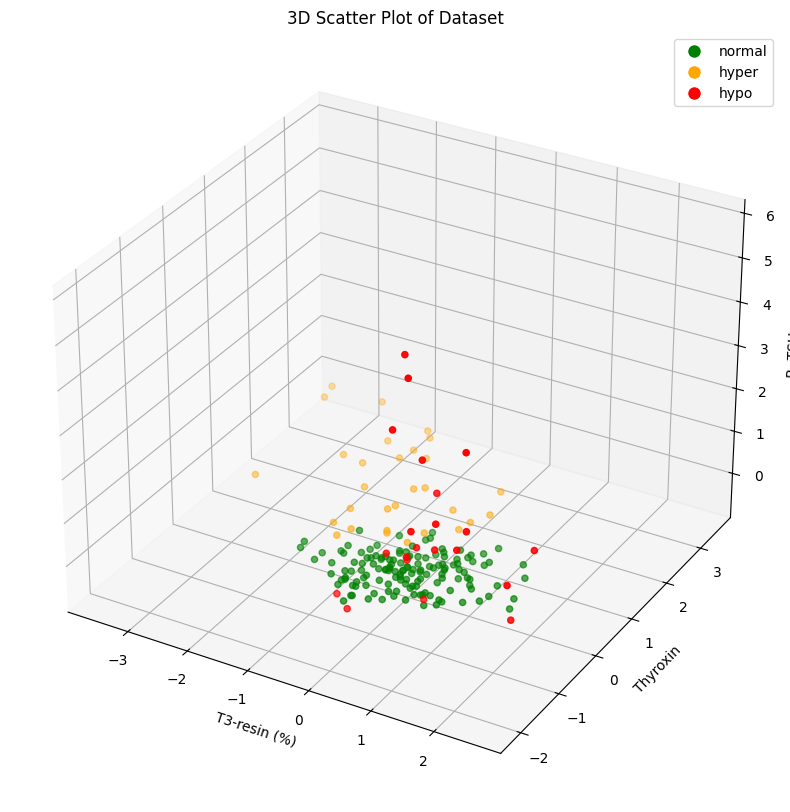

In [335]:
# 3 boyutlu  dataset_df verimizi çizdirelim.
from mpl_toolkits.mplot3d import Axes3D

# Plotting the DataFrame in 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(
    reduced_dataset_scaled_df['T3-resin (%)'],
    reduced_dataset_scaled_df['Thyroxin'],
    reduced_dataset_scaled_df['B. TSH'],
    c=dataset_df['Class'].map({'normal': 'green', 'hyper': 'orange', 'hypo': 'red'}),
    label=dataset_df['Class']
)

# Adding labels
ax.set_xlabel('T3-resin (%)')
ax.set_ylabel('Thyroxin')
ax.set_zlabel('B. TSH')
ax.set_title('3D Scatter Plot of Dataset')

# Adding legend
legend_labels = {'normal': 'green', 'hyper': 'orange', 'hypo': 'red'}
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in legend_labels.values()]
ax.legend(handles, legend_labels.keys())

plt.show()